In [78]:
import numpy as np

from scipy.interpolate import interp1d
from scipy.signal import argrelmin


from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

import os
import pickle

# Load Positions

In [81]:
run_folder = "track_data/Training_dataset_tech/run-2"
positions = pickle.load(open(os.path.join(run_folder, "positions.pkl"), "rb"))

raw_points = [list(pos['position'].to_numpy()) for pos in positions]
    
# remove duplicates:
points = [raw_points[0]]
for point in raw_points[1:]:
    if point != points[-1]:
        points.append(point)

points = np.array(points)
points

array([[1012.79998779,   10.21000004,  624.        ],
       [1012.79998779,   10.0613718 ,  624.        ],
       [1012.80010986,   10.0033493 ,  624.00042725],
       ...,
       [  60.28945541,    9.36445332,  335.13232422],
       [  52.93414688,    9.36468124,  335.08929443],
       [  45.18361664,    9.35267448,  335.04321289]])

# Parametric Curve

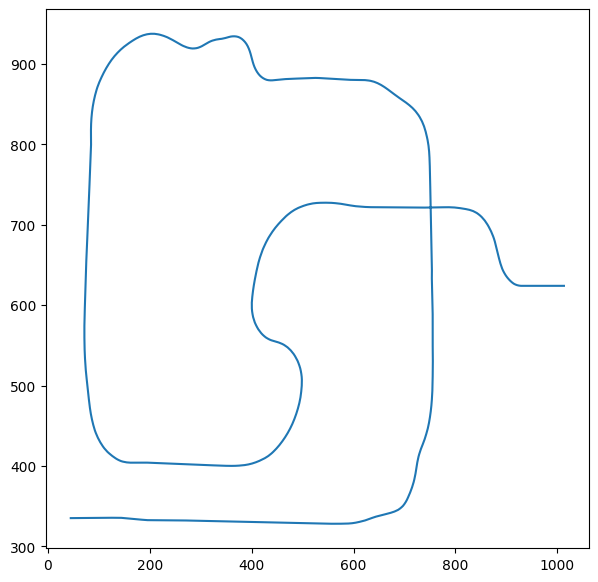

In [50]:
# Linear length along the line:
distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )))
distance = np.insert(distance, 0, 0)/distance[-1]

# Interpolation for different methods:
interpolations_methods = ['slinear']
alpha = np.linspace(0, 1, 1000)

interpolated_points = {}
for method in interpolations_methods:
    interpolator =  interp1d(distance, points, kind=method, axis=0)
    interpolated_points[method] = interpolator(alpha)

# Graph:
plt.figure(figsize=(7,7))
for method_name, curve in interpolated_points.items():
    plt.plot(*curve[:, [0, 2]].T, '-', label=method_name);

# plt.plot(*points[:, [0, 2]].T, 'ok', label='original points');
# plt.axis('equal'); plt.legend(); plt.xlabel('x'); plt.ylabel('y');

In [54]:
interpolator =  interp1d(distance, points, kind='linear', axis=0)
alpha = np.linspace(0, 1, 1000)
curve = interpolator(alpha)
curve

array([[1012.79998779,   10.21000004,  624.        ],
       [1009.3308022 ,   10.00693779,  623.99951172],
       [1005.65471538,    9.89842373,  623.99951172],
       ...,
       [  52.5394918 ,    9.36406986,  335.08694797],
       [  48.86155422,    9.35837217,  335.06508043],
       [  45.18361664,    9.35267448,  335.04321289]])

# Closest Point

In [56]:
def distance(x, y, z, x0, y0, z0):
    d_x = x - x0
    d_y = y - y0
    d_z = z - z0
    dis = np.sqrt( d_x**2 + d_y**2 + d_z**2)
    return dis

In [60]:
# This is what we really got
t = np.linspace(0, 1, 1000)
coords = interpolator(t)
x = coords[:,0]
y = coords[:,1]
z = coords[:,2]
coords

array([[1012.79998779,   10.21000004,  624.        ],
       [1009.3308022 ,   10.00693779,  623.99951172],
       [1005.65471538,    9.89842373,  623.99951172],
       ...,
       [  52.5394918 ,    9.36406986,  335.08694797],
       [  48.86155422,    9.35837217,  335.06508043],
       [  45.18361664,    9.35267448,  335.04321289]])

In [69]:
# The point P
P = (400, 12, 400)

# compute distance
dis = distance(x, y, z, P[0], P[1], P[2])
# find the minima
min_idxs = argrelmin(dis)[0]
# take the minimum
glob_min_idx = min_idxs[np.argmin(dis[min_idxs])]
# coordinates and distance
min_x = x[glob_min_idx]
min_y = y[glob_min_idx]
min_z = z[glob_min_idx]
min_d = dis[glob_min_idx]

In [70]:
interpolator(t[glob_min_idx])

array([401.05733311,  17.36853985, 402.99149154])

In [71]:
print(min_x, min_y, min_z)

401.0573331106726 17.368539848285746 402.99149154305275


In [72]:
min_d

6.236040014441262

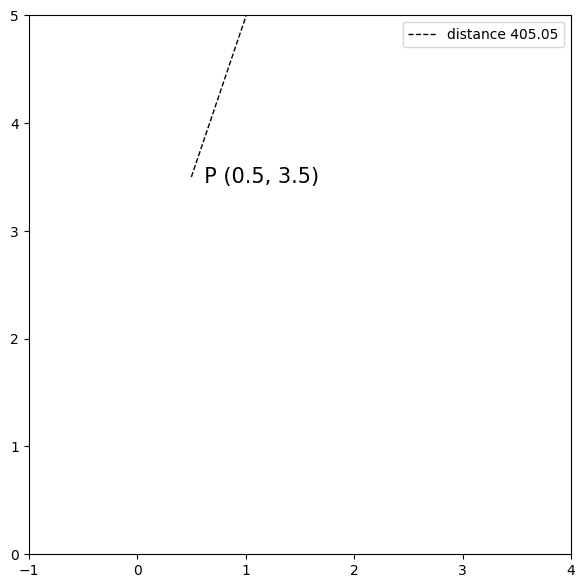

In [64]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(x, y, lw=4)
ax.plot(
    [P[0], min_x],
    [P[1], min_y],
    'k--', lw=1,
    label=f'distance {min_d:.2f}'
)
ax.plot(*P, 'or')
ax.text(
    P[0], P[1], 
    f"  P ({P[0]}, {P[1]})", 
    ha='left', va='center',
    fontsize=15
)
ax.set(
    xlim=(-1, 4),
    ylim=(0, 5),
)
ax.legend()
plt.show()

# Angle

In [10]:
P_vector = normalize(np.array([1, 1]).reshape(1, -1))
tangeant = normalize((interpolator(t[glob_min_idx] + 0.001) - interpolator(t[glob_min_idx])).reshape(1, -1))
tangeant

array([[0.43440978, 0.90071535]])

In [11]:
cos_angle = np.dot(P_vector.reshape(-1), tangeant.reshape(-1))
cos_angle

0.9440760343365118

In [12]:
angle = np.arccos(cos_angle)
angle

0.33601526739789334

# Train Track

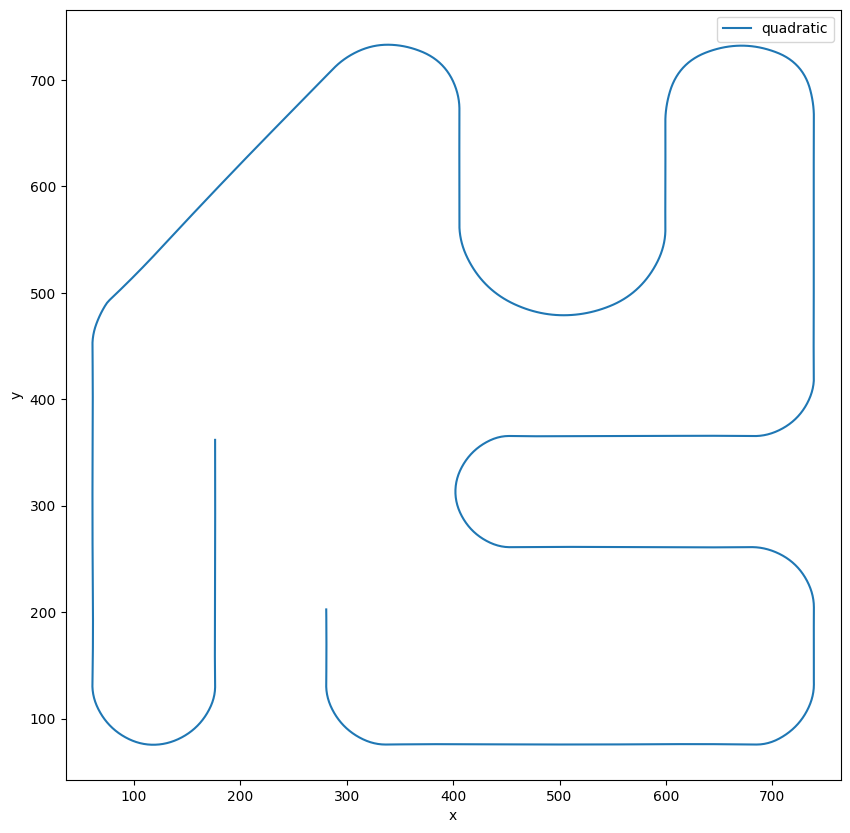

In [17]:
# Define some points:
points = np.array([[196, 402], [196, 275], [196, 148], [196, 143], [177, 103], 
                    [137, 84], [126, 84], [87, 103],[68, 143], [68, 151], 
                    [68, 325], [68, 497], [68, 503], [80, 540], [84, 546], 
                    [88, 550], [188, 654], [318, 788], [322, 792], [368, 814], 
                    [385, 814], [434, 792], [451, 749], [451, 744], [451, 686], 
                    [451, 630], [451, 625], [479, 564], [545, 533], [575, 533], 
                    [636, 559], [666, 620], [666, 625], [666, 671], [666, 731], 
                    [666, 736], [685, 791], [736, 813], [755, 813], [805, 791],
                    [821, 741], [821, 736], [821, 603], [821, 470], [821, 465],
                    [803, 425], [761, 406], [756, 406], [633, 406], [506, 406],
                    [501, 406], [466, 390], [447, 352], [447, 344], [465, 307],
                    [502, 290], [507, 290], [635, 290], [753, 290], [758, 290],
                    [802, 271], [821, 229], [821, 224], [821, 187], [821, 150],
                    [821, 145], [803, 104], [763, 84], [758, 84], [565, 84],
                    [377, 84], [372, 84], [331, 103], [312, 144], [312, 149],
                    [312, 225]])

SCALE_FACTOR = 0.9
points = SCALE_FACTOR*points

# Linear length along the line:
distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
distance = np.insert(distance, 0, 0)/distance[-1]

# Interpolation for different methods:
interpolations_methods = ['quadratic']
alpha = np.linspace(0, 1, 1000)

interpolated_points = {}
for method in interpolations_methods:
    interpolator =  interp1d(distance, points, kind=method, axis=0)
    interpolated_points[method] = interpolator(alpha)

# Graph:
plt.figure(figsize=(10,10))
for method_name, curve in interpolated_points.items():
    plt.plot(*curve.T, '-', label=method_name);

# plt.plot(*points.T, 'ok', label='original points');
plt.axis('equal'); plt.legend(); plt.xlabel('x'); plt.ylabel('y');

In [16]:
np.linspace(0, 1, 100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [44]:
distance

array([0.        , 0.03020612, 0.06041225, 0.06160146, 0.07213393,
       0.0826664 , 0.08528268, 0.09560081, 0.10613327, 0.10803602,
       0.14942079, 0.19032987, 0.19175693, 0.2010084 , 0.20272352,
       0.20406896, 0.23838443, 0.28278924, 0.28413469, 0.29626237,
       0.30030571, 0.31308081, 0.32407834, 0.32526756, 0.33906248,
       0.35238171, 0.35357093, 0.36953482, 0.38687784, 0.39401314,
       0.40978451, 0.42595262, 0.42714184, 0.43808264, 0.45235325,
       0.45354247, 0.46738243, 0.48059291, 0.48511194, 0.49810438,
       0.5105906 , 0.51177981, 0.543413  , 0.57504618, 0.5762354 ,
       0.58666803, 0.59763207, 0.59882129, 0.62807604, 0.65828216,
       0.65947138, 0.66862449, 0.67872934, 0.68063209, 0.69041842,
       0.70010306, 0.70129228, 0.73173625, 0.75980178, 0.760991  ,
       0.77239013, 0.78335417, 0.78454339, 0.7933436 , 0.80214381,
       0.80333302, 0.813983  , 0.82461968, 0.8258089 , 0.87171269,
       0.91642727, 0.91761649, 0.92836428, 0.93911207, 0.94030

In [45]:
np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )

array([ 114.3       ,  228.6       ,  233.1       ,  272.95486169,
        312.80972337,  322.70972337,  361.75354491,  401.60840659,
        408.80840659,  565.40840659,  720.20840659,  725.60840659,
        760.6159772 ,  767.1059695 ,  772.19713832,  902.04689766,
       1070.07475249, 1075.16592132, 1121.05709694, 1136.35709694,
       1184.69807335, 1226.31273423, 1230.81273423, 1283.01273423,
       1333.41273423, 1337.91273423, 1398.32010133, 1463.94608703,
       1490.94608703, 1550.62497777, 1611.80512161, 1616.30512161,
       1657.70512161, 1711.70512161, 1716.20512161, 1768.5755331 ,
       1818.56403178, 1835.66403178, 1884.8274328 , 1932.0752899 ,
       1936.5752899 , 2056.2752899 , 2175.9752899 , 2180.4752899 ,
       2219.95237186, 2261.44032191, 2265.94032191, 2376.64032191,
       2490.94032191, 2495.44032191, 2530.07570844, 2568.31247086,
       2575.51247086, 2612.54394396, 2649.19063549, 2653.69063549,
       2768.89063549, 2875.09063549, 2879.59063549, 2922.72496